<a href="https://colab.research.google.com/github/Alejandro-666/Data_Analysis_Retail/blob/main/Proyecto_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Módulo 1: Análisis de datos de una tienda Retail** 
---

**Estudiante: Sergio Alejandro Alvarado Parada.**


En el siguiente proyecto final se analizará la información de ventas recopilada de una tienda retail, con diferentes canales de venta en Estados Unidos entre los enero de 2011 y febrero de 2014.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [ ]:
%matplotlib inline

In [ ]:
sns.set_style("darkgrid")

##**1. Entendimiento del negocio**
---
El retail es un modelo de negocio donde se venden al por menor o al detalle una gran cantidad de productos, es un mercado donde hay una gran cantidad de competidores donde algunos de ellos tienen bastante dominantes debido a su gran disposición de capital y su capacidad de mantener precios bajos incurriendo incluso en pérdidas para atraer a más clientes y sacar competidores de este mercado. El retail se caracterisa principalmente por la venta de diferentes producto de varias categorías y subcategorías, lo que lo convierte en un negocio donde generalmente es necesario administrar cada categoría independientemente, sin embargo todas, al final de la operación, contribuyen al crecimiento del establecimiento.


En este proyecto se realizará el análisis de la información de una tienda retail, simulando un escenario donde el gerente o dueño de una tienda quiere conocer el estado del negocio y a partir de una serie de respuestas a preguntas hipotéticas generar soluciones ye strategias que permitan el crecimiento del negocio.

####**1.2. Objetivos del proyecto**
---
El principal objetivo del proyecto es organizar y analizar la información recopilada en el periodo de enero de 2011 y febrero de 2014 con métodos de estadística descriptiva, estadística inferencial y visualizaciones, con el fin de sacar conclusiones que permitan implementar nuevas estrategias de mercado y de esta forma impulsar las ventas de la tienda retail analizada en este proyecto. 

##**2. Recolección y entendimiento de los datos**
---
La información utilizada para este proyecto se obtuvo de la página www.kaggle.com, lo que significa que son datos abierto al público en general. El enlace al conjunto de datos se presenta al final del notebook en la sección 6 (Referencias).

Dentro de la información contenida se encuentran tres datasets que componen la información total de la tienda retail, estos datasets en formato csv (comma-separated values) son los siguientes:


1.   Customer.csv
2.   Transactions.csv
3.   Retail_customers.csv

A continuación se presenta la descripción de la información contenida en cada uno de los dataset.

In [ ]:
# Importar datasets que componen la información de la tienda retail

clientes = pd.read_csv('Customer.csv')
transacciones = pd.read_csv('Transactions.csv')
dic_categorias = pd.read_csv('Retail_customers.csv')

####**2.1. Dataset clientes:**
---
El dataset clientes contiene 4 columnas con información relevante de cada clientes que ha realizado compran en cualquiera de los canales de distribución. Las vriables de este dataset se presentan a continuación:


*   **customer_Id:** Código de identificación del cliente.
*   **DOB:** Columna no descrita.
*   **Gender:** Género del cliente.
*   **city_code:** Código de la ciudad del cliente

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   int64  
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 176.6+ KB


In [ ]:
clientes.head()

,customer_Id,DOB,Gender,city_code
0,268408,25570,M,4.0
1,269696,25575,F,8.0
2,268159,25576,F,8.0
3,270181,25578,F,2.0
4,268073,25579,M,1.0


####**2.2. Dataset transacciones:**
---
El dataset transacciones contiene 10 columnas con información relacionada a cada una de las trasacciones registradas durante el periodo de enero de 2011 a febrero de 2014. Las columnas de este data set se presentan a continuación:


*   **transaction_id:** Código de identificación de la transacción realizada.
*   **cust_id:** Código de identificación del cliente que realizó la operación.
*   **tran_date:** Fecha en la que se realizo la transacción.
*   **prod_subcat_code:** Código de la subcategoría del producto.
*   **prod_cat_code:** Código de la categoría del producto.
*   **Qty:** Columna no descrita.
*   **Rate:** Clumna no descrita.
*   **Tax:** Impuesto total de la transacción.
*   **total_amt:** Cantidad de dinero involucrado en la transacción.
*   **Store_type:** Plataforma en la que se realizó la transacción.


In [ ]:
transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [ ]:
transacciones.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


####**2.3. Dataset dic_categorias:**
---
El dataset categorías contiene 4 columnas con información relacionada con la definición de las categorías de los productos y sus respectivas subcategorías.



*   **prod_cat_code:** Código de la categoría del producto.
*   **prod_cat:** Definición de la categoría del producto.
*   **prod_sub_cat_code:** Código de la subcategoria del producto.
*   **prod_sub_cat:** Definición de la subcategoría del producto.


Las categorías de los productos con sus respectivas sucategorías se presentan a continuación:



1.   Categoría: Clothing / Subcategorías: Men, Women, Kids. 
2.   Categoría: Footwear / Subcategorías: Men, Women, Kids. 
3.   Categoría: Electronics / Subcategorías: Mobiles, Computers, Personal Appliances, Cameras, Audio and video.
4.   Categoría: Bags / Subcategorías: Men, Women.
5.   Categoría: Books / Subcategorías: Fiction, Academic, Non-Fiction, Children, Comics, DIY.
6.   Categoría: Home and Kitchen / Subcategorías: Furnishing, Kitchen, Bath, Tools





In [ ]:
dic_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
dic_categorias.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


**Nota:** Lamentablemente dentro de la información suministrada en el enlace que contiene la informción no se da una descripción sobre las variables DOB (en de dataset clientes), Qty y Rate (en el dataset transacciones). Así que para efectos académicos, no se tendrá en cuenta las columnas Qty y Rate del dataset transacciones y la columna DOB del dataset clientes se modificará más adelante.

##**3. Preparación de los datos**: 
---
Combinar la información de estos dos datasets permitirá tener una visión general más completa y facilitará enormemente trabajar y manipular esta información. Para esto al dataset "transacciones" se le agregará el contenido del dataset "clientes" mediante las columnas "cust_id" y "customer_Id" respectivamente. Para poder realizar la unión, las columnas deben tener el mismo nombre:

In [ ]:
# Cambio de nombre de la columna "customer_Id" por "cust_id" en el dataset clientes

clientes.rename({
    'DOB': 'Age',
    'customer_Id': 'cust_id'}, 
    axis=1,  inplace=True)

clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cust_id    5647 non-null   int64  
 1   Age        5647 non-null   int64  
 2   Gender     5645 non-null   object 
 3   city_code  5645 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 176.6+ KB


Dentro del dataset "clientes" se encuentra una columna llamada DOB, de la cual no se tiene descripción y no se sabe exactamente qué representa, así que para efectos del proyecto, se reemplazarán los datos edades aleatorias entre 15 y 80 años. Por otro lado, se quiere conocer el significado de la columna "prod_cat_code" (product category code), por lo que se agregará igualmente la columna de interés ("prod_cat") del dataset dic_categorias.

In [ ]:
# Reemplazo del nombres de la columna "DOB" por "Age" y "customer_Id" por "cust_id"

clientes.rename({
    'DOB': 'Age',
    'customer_Id': 'cust_id'}, axis=1,  inplace=True)
clientes['Age'] = np.random.randint(15, 80, clientes.shape[0], dtype=int)

In [ ]:
# Unión de los datasets "transacciones" y "clientes" 

transacciones = transacciones.merge(clientes, on='cust_id', how='left')

Igualmente, al información del dataset dic_categorías se unificará con el dataset transacciones. Para que este proceso pueda llevarse a cabo, es necesario que las columnas sobre las cuales se realizará el proceso merge deben tener el mismo nombre.

In [ ]:
# Reemplazo de la columna "prod_sub_cat_code" por "prod_subcat_code" para realizar la operación merge

dic_categorias.rename({
    'prod_sub_cat_code': 'prod_subcat_code'},
    axis=1,
    inplace=True)

In [ ]:
# unión de los datasets "transacciones" y "dic_categorias"

transacciones = transacciones.merge(dic_categorias,
                                    on=["prod_cat_code","prod_subcat_code"], 
                                    how="left")

transacciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  Age               23053 non-null  int64  
 11  Gender            23044 non-null  object 
 12  city_code         23045 non-null  float64
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 2.8+ MB


El proceso anterior se evidencia que la cantidad de registros en el dataset "transacciones" sigue siendo el mismo. Posterior a la operación Merge se visualizan un dos columnas con registros NaN (Not a Number), 9 NaN en la columna "Gender" y 8 NaN en la columna "city_code". Si se eliminan los registros con valores NaN, se estarían eliminando 17 registros como máximo (suponiendo que ningún registro tiene NaN en las dos columnas en cuestión), y estos registros eliminados representan el 0,074% de total de los datos. Así que se procede a eliminar dichos registros ya que su eliminación no implicará cambios significativos en el proceso de análisis. 

In [ ]:
# Eliminación de registros con valores NaN

transacciones.drop(transacciones[transacciones['Gender'].isna()].index, 
                   inplace=True)

transacciones.drop(transacciones[transacciones['city_code'].isna()].index, 
                   inplace=True)

transacciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23036 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23036 non-null  int64  
 1   cust_id           23036 non-null  int64  
 2   tran_date         23036 non-null  object 
 3   prod_subcat_code  23036 non-null  int64  
 4   prod_cat_code     23036 non-null  int64  
 5   Qty               23036 non-null  int64  
 6   Rate              23036 non-null  int64  
 7   Tax               23036 non-null  float64
 8   total_amt         23036 non-null  float64
 9   Store_type        23036 non-null  object 
 10  Age               23036 non-null  int64  
 11  Gender            23036 non-null  object 
 12  city_code         23036 non-null  float64
 13  prod_cat          23036 non-null  object 
 14  prod_subcat       23036 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 2.8+ MB


Una vez realizada la compilación de los dataset, se procede a realizar unas visualizaciones sencillas sobre algunos datos para poder identificar datos atípicos



In [ ]:
transacciones.to_csv('Transacciones_m1.csv', index=False)

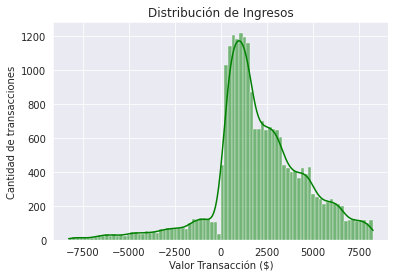

In [ ]:
graf_num_transacciones = sns.histplot(transacciones['total_amt'],
                                      color='green', 
                        kde=True)
graf_num_transacciones.set(xlabel='Valor Transacción ($)',
             ylabel='Cantidad de transacciones',
             title='Distribución de Ingresos')
graf_num_transacciones

En la gráfica anterior se puede ver los valores más frecuentes de ventas en todas las categorías ronda los 2000 dólares.

Para revisar si hay datos atípicos o outliers en la variable Tax, se puede realizar de manera visual graficando Tax vs total_amt. Esta gráfica debería ser una línea recta, si una dupla de valores está por fuera de valores, puede interpretarse como un outlier.

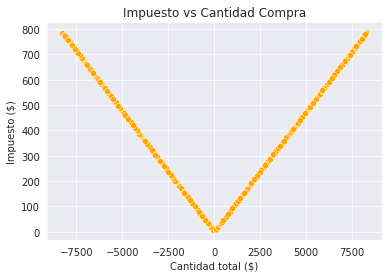

In [ ]:
tax_vs_total_amt = sns.scatterplot(data=transacciones,
                                   x='total_amt',
                                   y='Tax',
                                   color='orange')
tax_vs_total_amt.set(xlabel='Cantidad total ($)', 
                     ylabel='Impuesto ($)', 
                     title='Impuesto vs Cantidad Compra')
tax_vs_total_amt

En la gráfica anterior no se ve ningún dato atípico, no hay necesidad de eliminar o corregir datos en estas columnas.



##**4. Análisis de los datos**: 
---
Teniendo en cuenta que a partir de la información selecionada para este proyecto se pueden realizar una gran cantidad de análisis, se ha hecho el supuesto de **¿Cuáles podrían ser algunas de las muchas preguntas que se podría hacer el gerente (o dueño) de la tienda retail a partir de esta información?** Se seleccionaron algunas de estas preguntas y a partir de análisis de estadistica descriptiva, inferencial y modelado estadístico se pretenden responder. 


Las preguntas seleccionadas son las siguientes:


1.   ¿Cuál es la probabilidad (por edades) de que un cliente sea hombre o mujer?
2.   ¿Cuál es el mes que en promedio genera una mayor cantidad de ventas?
3.   ¿Cuál de los medios de distribución ha generado más ingresos en promedio por categorías?
4.   ¿Cuál es la proporción de hombres que compran elementos de hogar y cocina?
5.   ¿Ha variado la venta de computadores del años 2011 al año 2013?
6.   ¿Hay alguna correlación entre las ventas de artículos de tecnología (audio y video) con artículos de mobiliario?
7.   ¿Cuál es la ciudad en la que en promedio se realizan menos ventas a través de Flagship store? y ¿Esa diferencia es significativamente menor que el promedio de las demás ciudades?



####**4.1. ¿Cuál es la probabilidad (por edades) de que un cliente sea hombres o mujeres?**
---
Para conocer la probabilidad de que un cliente sea hombre o mujer se puede realizar la gráfica de densidad de probabilidad tanto para hombres como para mujeres e identificar a partir de ellas la respuesta buscada.

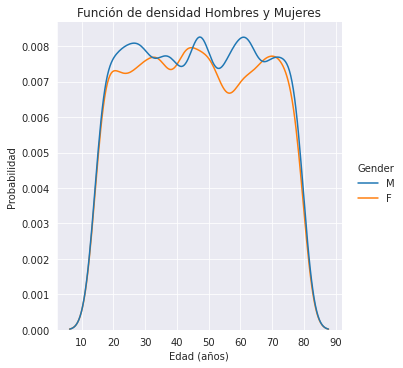

In [ ]:
age_male_female = sns.displot(data=transacciones, 
                          x="Age", kind="kde", 
                          hue = 'Gender');
age_male_female.set(xlabel='Edad (años)',
                    ylabel='Probabilidad',
                    title='Función de densidad Hombres y Mujeres')

A partir de la gráfica anterior se puede ver que ambas funciones de densidad son bastante uniformes. No se visualiza una edad que se repita más de forma relevante. Sin embargo sí se puede ver que en el rango de edades entre 20 y 40 años y entre 45 y 70 años, la probabilidad de que un comprador sea hombre es ligeramente mayor.

####**4.2. ¿Cuál es el mes que en promedio genera una mayor cantidad de ventas?**
---

Para reponder esta pregunta se realizará una tabla dinámica en la cual las filas serán los años del periodo de registros y las columnas serán los meses del año. Las celdas de la tabla será el promedio de ventas registrado en el respectivo mes (columna) y respectivo año (columna).

In [ ]:
# Se creará un DataFrame con la información necesaria: La columna "trans_date" y "total_amt"

auxiliar = transacciones[['tran_date', 'total_amt']] #DF creado para evitar advertecia

prom_mes_mas_ventas = auxiliar.copy() 

In [ ]:
# A prom_mes_mas_ventas se le crea una columna "Date" donde los string de la columna "trans_date" se vuelven
# objetos de la clase 'pandas._libs.tslibs.timestamps.Timestamp'

prom_mes_mas_ventas['Date'] = pd.to_datetime(prom_mes_mas_ventas['tran_date'], dayfirst=True)

In [ ]:
# La columna "Date" creada se dividirá en 3 columnas: Year, Mounth y Day

prom_mes_mas_ventas['Year'] = prom_mes_mas_ventas['Date'].apply(lambda x: x.year)
prom_mes_mas_ventas['Month'] = prom_mes_mas_ventas['Date'].apply(lambda x: x.month)
prom_mes_mas_ventas['Day'] = prom_mes_mas_ventas['Date'].apply(lambda x: x.day)

Para considerar únicamente años completos, no se tendrán en cuenta los registros de transacciones realizados en el año 2014.

In [ ]:
# Eliminación de la columna 'tran_date' y eliminación de datos del año 2014

del prom_mes_mas_ventas['tran_date']

prom_mes_mas_ventas.drop(prom_mes_mas_ventas[prom_mes_mas_ventas['Year'] == 2014].index, inplace=True)

In [ ]:
prom_mes_mas_ventas

,total_amt,Date,Year,Month,Day
1065,4375.800,2013-12-31,2013,12,31
1066,1164.670,2013-12-31,2013,12,31
1067,-838.695,2013-12-31,2013,12,31
1068,685.100,2013-12-31,2013,12,31
1069,2794.545,2013-12-31,2013,12,31
...,...,...,...,...,...
23048,1396.720,2011-01-25,2011,1,25
23049,748.085,2011-01-25,2011,1,25
23050,4649.840,2011-01-25,2011,1,25
23051,3785.730,2011-01-25,2011,1,25


In [ ]:
# Creación del DataFrame "table" que actúa como una tabla dinámica de Excel.

table = pd.pivot_table(prom_mes_mas_ventas, values='total_amt', index='Year', 
                       columns='Month', aggfunc=np.mean)

table = table.transpose()

In [ ]:
table

Year,2011,2012,2013
Month,,,
1,2392.254468,2012.392850,2260.065557
2,1931.231856,2152.722043,2192.167936
3,2121.012596,2279.046764,2194.051939
4,2265.745345,1835.070658,2155.436892
5,2007.106889,2043.942405,2091.137935
6,2112.974118,2281.686875,2059.620205
7,1968.872383,2057.185429,1950.511810
8,1938.011646,2114.061248,2130.662348
9,2151.401916,2115.028531,2093.304045


Al dataet "table" se le agregará una nueva columna la cual es el promedio del respectivo mes en los años 2011, 2012 y 2013. Adicionalmente, para efectos de visualización se agregará una nueva columna con una abreviación de los meses del año para evitar trabajar con número enteros para hacer referencia a los meses, a pesar de ser muy intuitivo usar número enteros para la representación de meses.


In [ ]:
table['Mean'] = table.mean(axis=1)

In [ ]:
table['Month'] = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

In [ ]:
table

Year,2011,2012,2013,Mean,Month
Month,,,,,
1,2392.254468,2012.392850,2260.065557,2221.570958,Ene
2,1931.231856,2152.722043,2192.167936,2092.040612,Feb
3,2121.012596,2279.046764,2194.051939,2198.037100,Mar
4,2265.745345,1835.070658,2155.436892,2085.417632,Abr
5,2007.106889,2043.942405,2091.137935,2047.395743,May
6,2112.974118,2281.686875,2059.620205,2151.427066,Jun
7,1968.872383,2057.185429,1950.511810,1992.189874,Jul
8,1938.011646,2114.061248,2130.662348,2060.911747,Ago
9,2151.401916,2115.028531,2093.304045,2119.911498,Sep


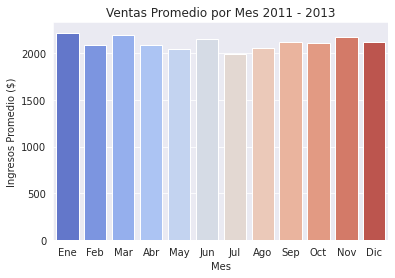

In [ ]:
ventas_mes_promedio = sns.barplot(data=table, 
                                  x='Month', 
                                  y='Mean', 
                                  palette='coolwarm')
ventas_mes_promedio.set(xlabel='Mes',
                        ylabel='Ingresos Promedio ($)',
                        title='Ventas Promedio por Mes 2011 - 2013')
ventas_mes_promedio

De la gráfica anterior podría decirse que enero es el mes en el que en promedio se reciben más ingresos por ventas y que julio es el mes en el que en promedio se reciben menos ingresos por ventas. Para corroborar estas conclusiones y conocer valores, se procede a calcular el promedio máximo y mínimo de ingresos por mes:

In [ ]:
maximo = table['Mean'].max()
mes_max = table._get_value(table['Mean'].idxmax(),'Month') 

minimo = table['Mean'].min()
mes_min = table._get_value(table['Mean'].idxmin(),'Month')

print(f'El mes que en promedio tiene más ingresos es {mes_max} con ${maximo}')
print(f'El mes que en promedio tiene menos ingresos es {mes_min} con ${minimo}')

El mes que en promedio tiene más ingresos es Ene con $2221.5709584873853
El mes que en promedio tiene menos ingresos es Jul con $1992.1898742362964


Con el análisis anterior se confirma la idea inicial, efectivamente en el mes de enero tiene mayores ingresos en promedio y julio tiene en promedio menos ingresos. Se esperaría que fuera diciembre el mes que mayores ingresos en ventas en promedio. Para aprovechar las fechas navideñas, en diciembre se podrían realizar estrategias de marketing, descuentos, promociones, etc. para impulsar más las venta en diciembre ya que este mes tiene un gran potencial de compra por parte de los clientes.

####**4.3. ¿Cuál de los medios de distribución ha generado más ingresos en promedio por categorías?**
---

La respuesta a esta pregunta puede obtenerse de forma visual a partir de una gráfica de barras que muestre en el eje x, las categorías de productos y sus respectivas ventas en cada unos de los canales de distribución de la tienda vs el promedio de ingresos generados durante el periodo de registro.


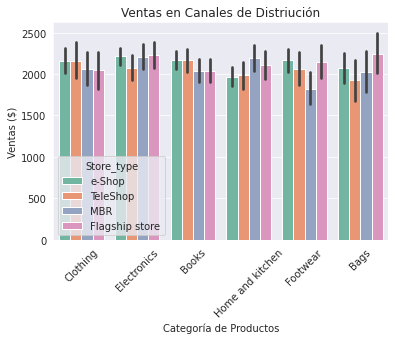

In [ ]:
canales = sns.barplot(data=transacciones,
                      x='prod_cat',
                      y='total_amt',
                      hue='Store_type',
                      palette='Set2')
canales.set_xticklabels(canales.get_xticklabels(), 
                          rotation=45)
canales.set(xlabel='Categoría de Productos',
            ylabel='Ventas ($)',
            title='Ventas en Canales de Distriución')
canales

De la gráfica anterior se pueden sacar las siguientes conclusiones:


*   Ropa (Clothing): Se vende más por Teleshop y menos por Flagship stores 
*   Tecnología (Electronis): Se vende más por Flagship stores y menos por Teleshop.
*   Libros (Books): Se vende más por e-shop y menos por Flagship stores.
*   Hogar y cocina (hme and kitchen): se vende más por MBR y menos por e-shop.
*   Calzado (Footwear): Se vende más por e-shop y menos por MBR.
*   Maletas (Bags): Se vende más por Flagship stores y menor por Teleshop.








####**4.4. ¿Cuál es la proporción de hombres que compran elementos de hogar y cocina?**
---

Del departamento de Hogar y Cocina se quiere conocer la proporción de hombres que compran artículos de este departamento. Este departamento quiere conocer esta proporción para decidir si implementar publicidad de artículos de hogar y cocina enfocada a hombres, dependiendo de los resultados se puede tomar una decisión al respecto.

In [ ]:
# Cálculo del total de hombres en la muestra

total_M = transacciones.loc[transacciones['Gender']=='M'].shape[0]
total_M

11805

La cantidad de hombres que han realizado una compra (en cualquier departamento) es 11805.

In [ ]:
# Cantidad de hombres que compraron elementos de hogar y cocina

hombres_cocina = transacciones.loc[(transacciones['Gender']=='M') &
                                   (transacciones['prod_cat']=='Home and kitchen')].shape[0]
hombres_cocina

2132

La cantidad de hombres que han realizado una compra en el departamento de hogar y cocina es 2132.

In [ ]:
# Proporción de hombres que compraron elementos de hogar y cocina en la muestra

prop_hombres = hombres_cocina / total_M
confianza = 0.95

prop_hombres

0.1806014400677679

La proporción de hombres que ha comprado artículos de departamento Hogar y Cocina es 18.06%

In [ ]:
# Creación del intervalo de la proporción con un 95% de confianza.

limite_inferior, limite_superior = sm.stats.proportion_confint(total_M * prop_hombres, total_M)

intervalo = (limite_inferior, limite_superior)

intervalo

(0.17366201807798215, 0.18754086205755366)

El resultado anterior nos permite decir que la proporción de hombres que comprar artículos de la categoría hogar y cocina (Home and Kitchen) está entre un 17,4% y un 18,8% con un 95% de confianza. A partir del análisis anterior se podrían tomar varias alternativas, si para la tienda que un 20% del total de hombres compre artículos de la categoría hogar y cocina está bien, se puede seguir la estrategia que se ha implementado hasta el momento, si es un porcentaje bajo, debería cambiarse el enfoque de la publicidad, por ejemplo.

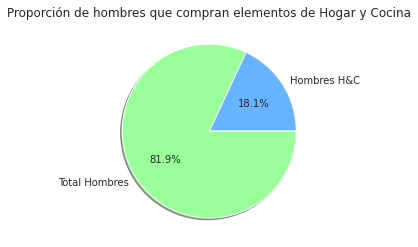

In [ ]:
# Gráfica pie de la proporción de hombres que comprar artículos de hogar y cocina.

labels = 'Hombres H&C', 'Total Hombres'
sizes = [prop_hombres, 1-prop_hombres]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        autopct='%1.1f%%',
        colors=['#66b3ff','#99ff99'],
        shadow=True)
ax1.set_title("Proporción de hombres que compran elementos de Hogar y Cocina")
ax1

####**4.5. ¿Ha variado la venta de computadores del año 2011 al año 2013?**
---

También quisiera conocer la efectividad de la nueva estrategia de marketing de computadores implementada en el año 2011, así que se desea averiguar si hay alguna diferencia entre los ingresos por computadores en los años 2011 y 2013. Para responder a esta pregunta se realizará una prueba de hipótesis donde:

* Hipótesis nula $H_0: \mu_1 2011 = \mu_2 2013$ ($\mu_1 2011 - \mu_2 2013 = 0$)
* Hipótesis alternativa $H_a: \mu_12011 \neq \mu_22013$ ($\mu_12011 - \mu_22013 \neq 0$)

La hipótesis nula sugiere que no hay difencia entre las medias de ventas de computadores entre los años 2011 y 2013 y la hipótesis alternativa sugiere que sí hay una diferencia significativa entre las medias de ventas entre los años 2011 y 2013.

In [ ]:
# Creación de un dataframe únicamente con las transacciones de computadores.

computadores = transacciones.loc[(transacciones['prod_subcat'] == 'Computers'),
                                      ['prod_subcat','total_amt','tran_date']]
computadores

,prod_subcat,total_amt,tran_date
1,Computers,-8270.925,27-02-2014
10,Computers,8270.925,20-02-2014
22,Computers,3987.945,20-02-2014
104,Computers,5931.640,15-02-2014
178,Computers,649.740,11/2/2014
...,...,...,...
22988,Computers,1443.130,28-01-2011
22991,Computers,2563.600,28-01-2011
23003,Computers,1434.290,27-01-2011
23026,Computers,5295.160,26-01-2011


In [ ]:
# Modificación del formato de la columna 'tran_date' para dividir las transacciones por año.

computadores['Date'] = pd.to_datetime(computadores['tran_date'], dayfirst=True)
computadores['Year'] = computadores['Date'].apply(lambda x: x.year)
computadores

,prod_subcat,total_amt,tran_date,Date,Year
1,Computers,-8270.925,27-02-2014,2014-02-27,2014
10,Computers,8270.925,20-02-2014,2014-02-20,2014
22,Computers,3987.945,20-02-2014,2014-02-20,2014
104,Computers,5931.640,15-02-2014,2014-02-15,2014
178,Computers,649.740,11/2/2014,2014-02-11,2014
...,...,...,...,...,...
22988,Computers,1443.130,28-01-2011,2011-01-28,2011
22991,Computers,2563.600,28-01-2011,2011-01-28,2011
23003,Computers,1434.290,27-01-2011,2011-01-27,2011
23026,Computers,5295.160,26-01-2011,2011-01-26,2011


In [ ]:
# Creación de un dataframe únicamente con las transacciones de computadores en el 2011.

computadores_2011 = computadores.loc[computadores['Year'] == 2011]
computadores_2011 

,prod_subcat,total_amt,tran_date,Date,Year
16064,Computers,340.34,31-12-2011,2011-12-31,2011
16071,Computers,6508.45,31-12-2011,2011-12-31,2011
16086,Computers,2148.12,30-12-2011,2011-12-30,2011
16113,Computers,1838.72,29-12-2011,2011-12-29,2011
16246,Computers,2260.83,22-12-2011,2011-12-22,2011
...,...,...,...,...,...
22988,Computers,1443.13,28-01-2011,2011-01-28,2011
22991,Computers,2563.60,28-01-2011,2011-01-28,2011
23003,Computers,1434.29,27-01-2011,2011-01-27,2011
23026,Computers,5295.16,26-01-2011,2011-01-26,2011


In [ ]:
# Creación de un dataframe únicamente con las transacciones de computadores en el 2013.

computadores_2013 = computadores.loc[computadores['Year'] == 2013]
computadores_2013

,prod_subcat,total_amt,tran_date,Date,Year
1089,Computers,-6073.080,30-12-2013,2013-12-30,2013
1090,Computers,4583.540,30-12-2013,2013-12-30,2013
1103,Computers,2813.330,30-12-2013,2013-12-30,2013
1111,Computers,5432.180,29-12-2013,2013-12-29,2013
1131,Computers,6073.080,28-12-2013,2013-12-28,2013
...,...,...,...,...,...
8400,Computers,1074.060,6/1/2013,2013-01-06,2013
8429,Computers,1359.150,5/1/2013,2013-01-05,2013
8433,Computers,4425.525,5/1/2013,2013-01-05,2013
8501,Computers,3359.200,2/1/2013,2013-01-02,2013


In [ ]:
# Prueba de hipótesis de diferencias de medias poblacionales, con una significancia de 5%

z_score, p_valor = sm.stats.ztest(computadores_2011['total_amt'], 
                                  computadores_2013['total_amt'],         
                                  value=0,                
                                  alternative='two-sided' 
                                  )
print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: 0.13569777891627272
p-valor: 0.8920602036478242


Del análisis realizado previamente, se observa que el p-value no es menor que el nivel de significancia elegido, no hay evidencia suficiente en los datos como para rechazar la hipótesis nula (Ho: No hay diferencia en el ingreso por computadores en los años 2011 y 2013). Por lo que se podría realizar un cambio en la estrategia utilizada por la tienda hasta el momento para publicitar sus computadores.

####**4.6. ¿Hay alguna correlación entre las ventas de artículos de tecnología de audio y video y artículos de mobiliario?**
---
La tienda quiere saber si existe alguna relación entre las ventas de artículos de audio y video y artículos de mobiliario. Se procede a crear un dataframe donde se ordenarán las ventas de audio y video y mobiliario por días, si en algún día en particular no se vendieron artículos de ambas subcategorías, se eliminará ese día en cuestión.

In [ ]:
audio_video = transacciones.loc[transacciones['prod_subcat'] == 'Audio and video',
                                ['tran_date','prod_subcat','total_amt']]
audio_video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 27 to 23020
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tran_date    951 non-null    object 
 1   prod_subcat  951 non-null    object 
 2   total_amt    951 non-null    float64
dtypes: float64(1), object(2)
memory usage: 29.7+ KB


In [ ]:
mobiliario = transacciones.loc[transacciones['prod_subcat'] == 'Furnishing',
                               ['tran_date','prod_subcat','total_amt']]
mobiliario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 48 to 23050
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tran_date    1006 non-null   object 
 1   prod_subcat  1006 non-null   object 
 2   total_amt    1006 non-null   float64
dtypes: float64(1), object(2)
memory usage: 31.4+ KB


In [ ]:
correlacion = audio_video.merge(mobiliario,
                                on='tran_date',
                                how='left')
correlacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1236
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_date      1237 non-null   object 
 1   prod_subcat_x  1237 non-null   object 
 2   total_amt_x    1237 non-null   float64
 3   prod_subcat_y  876 non-null    object 
 4   total_amt_y    876 non-null    float64
dtypes: float64(2), object(3)
memory usage: 58.0+ KB


En el resumen de la información suministrada del dataset "correlación" se puede ver que en hay una menor cantidad de días en las que se compran elementos de la subcategoría 'mobiliario', así que se eliminarán las filas con valores NaN para poder hacer el análisis de correlación.

In [ ]:
correlacion.drop(correlacion[correlacion['total_amt_y'].isna()].index, 
                   inplace=True)
correlacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 2 to 1234
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_date      876 non-null    object 
 1   prod_subcat_x  876 non-null    object 
 2   total_amt_x    876 non-null    float64
 3   prod_subcat_y  876 non-null    object 
 4   total_amt_y    876 non-null    float64
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Los días con transacciones negativas (devoluciones) tampoco se tendrá en cuenta, ya que no es el objetivo del análisis en cuestión

In [ ]:
correlacion.drop(correlacion[correlacion['total_amt_x']<0].index, inplace=True)
correlacion.drop(correlacion[correlacion['total_amt_y']<0].index, inplace=True)
correlacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 2 to 1234
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_date      727 non-null    object 
 1   prod_subcat_x  727 non-null    object 
 2   total_amt_x    727 non-null    float64
 3   prod_subcat_y  727 non-null    object 
 4   total_amt_y    727 non-null    float64
dtypes: float64(2), object(3)
memory usage: 34.1+ KB


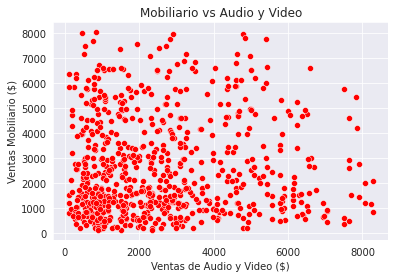

In [ ]:
#Creación de la gráfica (scatterplot) entre las ventas de audios y video y mobiliario

graf_corr = sns.scatterplot(data=correlacion,
                            x='total_amt_x',
                            y='total_amt_y',
                            color='red')
graf_corr.set(xlabel='Ventas de Audio y Video ($)',
              ylabel='Ventas Mobiliario ($)',
              title='Mobiliario vs Audio y Video')
graf_corr

In [ ]:
coef_corr = correlacion['total_amt_x'].corr(correlacion['total_amt_y'])
coef_corr

0.02840115489528886

El análisis de correlación anterior muestra un coeficiente de correlación de 0.028, el cual está muy cercano a cero, lo cual indica que no hay correlación alguna entre las ventas de artículos de Audio y video con artículos de Mobiliario.

Sin embargo, puede obtenerse una conclusión a partir de otro tipo de gráfica. Si se quisiera ver qué valor de venta se ha presentado una mayor cantidad de días se puede optar por una gráfica jointplot (kind="hex").

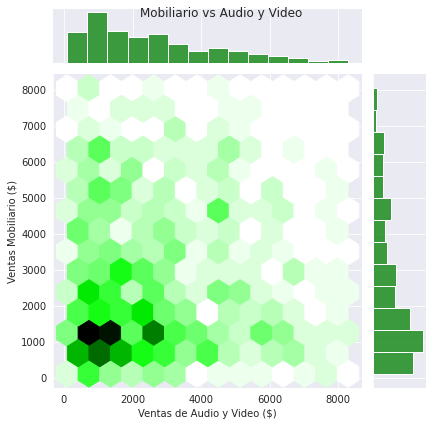

In [ ]:
graf_corr_2 = sns.jointplot(x=correlacion['total_amt_x'], 
                            y=correlacion['total_amt_y'], 
                            kind="hex", 
                            color='green')
graf_corr_2.set_axis_labels('Ventas de Audio y Video ($)',
              'Ventas Mobiliario ($)')
graf_corr_2.fig.suptitle("Mobiliario vs Audio y Video")
graf_corr_2

En el jointplot anterior se evidencia una alta concentración de días donde las ventas de ambas subcategorías (audio y video y mobiliario) están entre los valores de \$1000 y \$2000 dólares. Esto puede ser un buen indicio para crear promociones de productos de ambas categorías. 

####**4.7. ¿Cuál es la ciudad que menos compra en Flagship stores?**
---
Para concluir el proeycto, dentro del sin fin de análisis posibles por hacer, se quiere conocer cuál ciudad genera la menos cantidad de ventas en total y si este valor total de ventas es significativamente menor que el promerio de las demás ciudades.

In [ ]:
# Creación de un dataframe a partir de un groupby para visualizar rápidamente los valores requeridos en el análisis

flagship = transacciones.loc[transacciones['Store_type'] == 'Flagship store']
flagship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 17 to 23039
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    4575 non-null   int64  
 1   cust_id           4575 non-null   int64  
 2   tran_date         4575 non-null   object 
 3   prod_subcat_code  4575 non-null   int64  
 4   prod_cat_code     4575 non-null   int64  
 5   Qty               4575 non-null   int64  
 6   Rate              4575 non-null   int64  
 7   Tax               4575 non-null   float64
 8   total_amt         4575 non-null   float64
 9   Store_type        4575 non-null   object 
 10  Age               4575 non-null   int64  
 11  Gender            4575 non-null   object 
 12  city_code         4575 non-null   float64
 13  prod_cat          4575 non-null   object 
 14  prod_subcat       4575 non-null   object 
dtypes: float64(3), int64(7), object(5)
memory usage: 571.9+ KB


In [ ]:
ingresos_ciudades = flagship.groupby('city_code').agg({'total_amt': np.mean})
ingresos_ciudades

,total_amt
city_code,
1.0,2010.338940
2.0,2099.085926
3.0,2374.112713
4.0,2080.334708
5.0,2056.803686
6.0,2075.518514
7.0,2177.955000
8.0,2028.318974
9.0,2102.067924


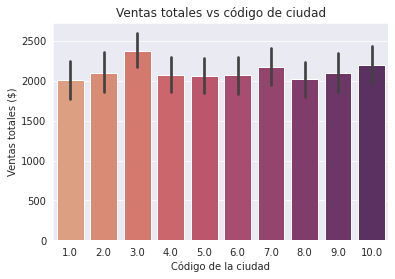

In [ ]:
graf_ciudades = sns.barplot(data=flagship,
                            x='city_code',
                            y='total_amt',
                            palette='flare')
graf_ciudades.set(xlabel='Código de la ciudad',
                  ylabel='Ventas totales ($)',
                  title='Ventas totales vs código de ciudad')
graf_ciudades

In [ ]:
ciudad_min = ingresos_ciudades['total_amt'].min()
ciudad_min

2010.3389403973501

In [ ]:
ciudad_min_code = ingresos_ciudades.loc[ingresos_ciudades['total_amt'] == ciudad_min].index[0]
ciudad_min_code

1.0

La ciudad que genera el menor ingreso en promedio por ventas a través de Flagship stores es la de código 1.0. Para saber si este valor promedio es significativamente menor al promedio de las demás ciudades, se realizará una prueba de hipótesis.

In [ ]:
ciudad_1 = flagship.loc[flagship['city_code']==1.0,['total_amt']]
ciudad_1

,total_amt
52,1697.280
90,1980.160
115,5631.080
172,1905.020
185,4831.060
...,...
22896,433.160
22899,-1303.900
22950,3158.090
22998,1303.900


In [ ]:
ciudades_restantes = flagship.loc[flagship['city_code']!=1.0,['total_amt']]
ciudades_restantes

,total_amt
17,1664.130
29,106.080
39,7514.000
41,889.525
42,1124.890
...,...
23023,1064.115
23027,1629.875
23030,3739.320
23033,304.980


In [ ]:
# Prueba de hipótesis de diferencias de medias poblacionales, con una significancia de 5%

z_score, p_valor = sm.stats.ztest(ciudad_1, 
                                  ciudades_restantes,         
                                  value=0,                
                                  alternative='two-sided' 
                                  )
print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: [-1.00027973]
p-valor: [0.31717515]


Como el p-value obtenido es mayor que el nive de significancia obtenido, no hay evidencia suficiente para rechazar la hipótesis nula en favor de la alternativa. Siendo la hipótesis nula: "No existe diferencia entre la media de ingresos por ventas de la ciudad con el código 1.0 del resto de las ciudades. 

###**4.8. Visualización de las ventas totales por mes para los años 2011, 2012 y 2013**
---
Finalmente, a petición del gerente del banco se quiere obtener una gráfica dónde se visualizen los ingresos totales por mes de los años 2011, 2012 y 2013.

In [ ]:
# Se utilizará el dataframe "prom_mes_mas_ventas" creado en el numeral 4.1 para el desarrollo de este punto.

prom_mes_mas_ventas

,total_amt,Date,Year,Month,Day
1065,4375.800,2013-12-31,2013,12,31
1066,1164.670,2013-12-31,2013,12,31
1067,-838.695,2013-12-31,2013,12,31
1068,685.100,2013-12-31,2013,12,31
1069,2794.545,2013-12-31,2013,12,31
...,...,...,...,...,...
23048,1396.720,2011-01-25,2011,1,25
23049,748.085,2011-01-25,2011,1,25
23050,4649.840,2011-01-25,2011,1,25
23051,3785.730,2011-01-25,2011,1,25


A partir del dataset anterior, se crearán 3 dataset para ls años 2011, 2012 y 2013 para extraer únicamente la información de interés, la cual es el total de ingresos por venta, el mes de la venta y el año a evaluar.

In [ ]:
ingresos_2011 = prom_mes_mas_ventas.loc[prom_mes_mas_ventas['Year']==2011]
ingresos_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 16062 to 23052
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   total_amt  6991 non-null   float64       
 1   Date       6991 non-null   datetime64[ns]
 2   Year       6991 non-null   int64         
 3   Month      6991 non-null   int64         
 4   Day        6991 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 327.7 KB


In [ ]:
ingresos_mes_2011 = ingresos_2011.groupby('Month').agg({'total_amt': sum})
ingresos_mes_2011

,total_amt
Month,
1,337307.880
2,1087283.535
3,1376537.175
4,1379838.915
5,1174157.530
6,1221299.040
7,1309300.135
8,1230637.395
9,1437136.480


In [ ]:
ingresos_2012 = prom_mes_mas_ventas.loc[prom_mes_mas_ventas['Year']==2012]
ingresos_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7541 entries, 8521 to 16061
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   total_amt  7541 non-null   float64       
 1   Date       7541 non-null   datetime64[ns]
 2   Year       7541 non-null   int64         
 3   Month      7541 non-null   int64         
 4   Day        7541 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 353.5 KB


In [ ]:
ingresos_mes_2012 = ingresos_2012.groupby('Month').agg({'total_amt': sum})
ingresos_mes_2012

,total_amt
Month,
1,1207435.710
2,1306702.280
3,1440357.555
4,1212981.705
5,1351045.930
6,1295998.145
7,1246654.370
8,1321288.280
9,1317662.775


In [ ]:
ingresos_2013 = prom_mes_mas_ventas.loc[prom_mes_mas_ventas['Year']==2013]
ingresos_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 1065 to 8520
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   total_amt  7456 non-null   float64       
 1   Date       7456 non-null   datetime64[ns]
 2   Year       7456 non-null   int64         
 3   Month      7456 non-null   int64         
 4   Day        7456 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 349.5 KB


In [ ]:
ingresos_mes_2013 = ingresos_2013.groupby('Month').agg({'total_amt': sum})
ingresos_mes_2013

,total_amt
Month,
1,1378639.990
2,1194731.525
3,1465626.695
4,1276018.640
5,1286049.830
6,1254308.705
7,1222970.905
8,1397714.500
9,1337621.285


A continuación se creará un dataframe donde se recopilará la información de los ingresos mensuales para cada uno de los años a evaluar. Y a partir de este dataframe se creará la gráfica solicitada.

In [ ]:
ventas_por_año = ingresos_mes_2011.copy()
ventas_por_año.rename({
    'total_amt':'total_amt_2011'},
    axis=1, inplace=True)
ventas_por_año['total_amt_2012'] = ingresos_mes_2012['total_amt'].copy()
ventas_por_año['total_amt_2013'] = ingresos_mes_2013['total_amt'].copy()
ventas_por_año['Month'] = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas_por_año

,total_amt_2011,total_amt_2012,total_amt_2013,Month
Month,,,,
1,337307.880,1207435.710,1378639.990,Ene
2,1087283.535,1306702.280,1194731.525,Feb
3,1376537.175,1440357.555,1465626.695,Mar
4,1379838.915,1212981.705,1276018.640,Abr
5,1174157.530,1351045.930,1286049.830,May
6,1221299.040,1295998.145,1254308.705,Jun
7,1309300.135,1246654.370,1222970.905,Jul
8,1230637.395,1321288.280,1397714.500,Ago
9,1437136.480,1317662.775,1337621.285,Sep


Text(0, 0.5, 'Ingresos totales (en millones de $)')

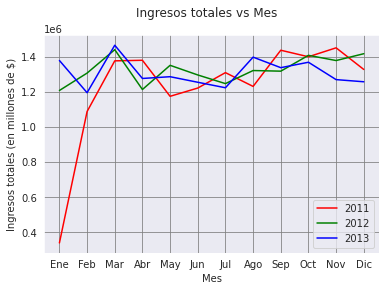

In [ ]:
# Gráfica de ingresos totales vs mes

plt.suptitle('Ingresos totales vs Mes')
plt.plot(ventas_por_año['Month'], ventas_por_año['total_amt_2011'], 'r', label='2011')
plt.plot(ventas_por_año['Month'], ventas_por_año['total_amt_2012'], 'g', label='2012')
plt.plot(ventas_por_año['Month'], ventas_por_año['total_amt_2013'], 'b', label='2013')
plt.grid(True, ls='-',color='0.5')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Ingresos totales (en millones de $)')

Analizando la gráfica anterior se evidencia una incremento en ventas de enero de 2011 a marzo de 2011. Es decir, en dos meses de operación se llegó al un ingreso total en ventas muy similar al promedio en los años siguientes. 

##**5. Conclusiones**
---

De los análisis realizados se presentan las siguientes conclusiones:


1.   Función de densidad de edades de hombres y mujeres: A partir de la gráfica anterior se puede ver que ambas funciones de densidad son bastante uniformes. No se visualiza una edad que se repita más de forma relevante. Sin embargo sí se puede ver que en el rango de edades entre 20 y 40 años y entre 45 y 70 años, la probabilidad de que un comprador sea hombre es ligeramente mayor.

2.   ¿Cuál es el mes que en promedio genera una mayor cantidad de ventas? Curiosamente, el mes que genera más ventas en promedio (entre los años 2011 y 2013) no es diciembre, es enero. Y el mes que menos ventas genera es julio.

3.   ¿Cuál es el medio que en promedio genera una mayor cantidad de ventas? En este apartado se realizó una gráfica de barras para identifica qué categorías de artículos se venden más por los diferentes canales de venta. Los resultados son los siguientes:

*   Ropa (Clothing): Se vende más por Teleshop y menos por Flagship stores 
*   Tecnología (Electronis): Se vende más por Flagship stores y menos por Teleshop.
*   Libros (Books): Se vende más por e-shop y menos por Flagship stores.
*   Hogar y cocina (hme and kitchen): se vende más por MBR y menos por e-shop.
*   Calzado (Footwear): Se vende más por e-shop y menos por MBR.
*   Maletas (Bags): Se vende más por Flagship stores y menor por Teleshop.

4.   ¿Cuál es la proporción de de hombres que compran elementos de hgar y cocina? Realizando un cálculo sencillo con los datos disponibles se obtuvo un resultado de 18,1%. Tomando este resultado como la proporción de la meustra, se puede generar un intervalo de confianza para conocer la cantidad de hombres que compran elementos de hogar y cocina con respecto a todos los hombres que compran en tiendas retail. Para un 95% de confianza, la proporción mencionada está entre 17,4% y 18,8%.

5.   ¿Ha variado la venta de computadores del año 2011 al año 2013? Realizando una prueba de hipótesis de dos colas para los registros de ventas de la subcategoría computadores entre los años 2011 y 2013, se puede concluir que no hay evidencia suficiente para rechazar la hipótesis nula (Ho: Las ventas totales de computadores no ha variado entre los años 2011 y 2013) en favor de la hipótsis alterna.

6.   ¿Hay alguna correlación entre las ventas de artículos de la subcategoría "Audio y video" y los artículos de Mobiliario? El análisis de correlación realizado sugiere un coeficiente de correlación de 0.028, el cual es prácticamente cero, por lo que se puede concluir que no existe correlación entre la ventas de los artículos de audio y video y mobiliario. Quizá esta pueda ser una oportunidad para generar nuevas estrategias de marketing ya que existe una alta concentración de días donde se venden artículos de audio y video y mobiliario por valor de aproximadamente $2000.

7.   ¿Cuál es la ciudad en la que menos ingresos en promedio se generan en ls tiendas insignia (flagship store) y este promedio es significativamente menor que el promedio de las flagship store en las demás ciudades? La ciudad en la que menos ingresos se presenta es en la ciudad con el código 1.0, haciendo una prueba de hipótesis no se encuentra evidencia suficiente para rechazar la hipótesis nula (Ho: No hay diferencias entre el promedio de ingresos por flagship store de la ciudad con el código 1.0 y el promedio de ingresos por flagship store en las demás ciudaddes) en favor de la hipótesis alterna. Sí este análisis hubiera arrojado que se rechaza la hipótesis nula en favor de la alterna, es probable que fuera necesario evaluar la situación de la flagship store para ver si se aumenta la publicidad en esta ciudad o si es necesario cerrarla debido a que los costos de la flagship stores son mayores que los ingresos.

8.  Analizando la gráfica anterior se evidencia una incremento en ventas de enero de 2011 a marzo de 2011. Es decir, en dos meses de operación se llegó al un ingreso total en ventas muy similar al promedio en los años siguientes. Lo anterior no es necesariamente bueno, ya se observa un claro estancamiento del crecimiento acelerado que se tuvo en los dos primeros meses iniciales. La ventaja es que después de marzo de 2011 hasta diciembre de 2013 estabilizaron las ventas (o se estancaron, depende qué se quiera analizar). Lo que sí puede ser necesario es hacer un cambio en la visión de la empresa apuntando a generar un incremento total en los ingresos de una forma no tan acelerada ya que es poco probable que un crecimiento acelerado no sea sostenible en el largo plazo (como se vio en los dos primeros meses de operación).








##**6. Referencias**
---
Enlace donde se puede encontrar el conjuto de datos utilizado para el desarrollo de este notebook.


https://www.kaggle.com/darpan25bajaj/retail-case-study-data